In [15]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [16]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)
model.save('handwritten.model')


Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2583 - accuracy: 0.9240
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1064 - accuracy: 0.9675
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0737 - accuracy: 0.9773
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0536 - accuracy: 0.9831
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0411 - accuracy: 0.9867
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0333 - accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0260 - accuracy: 0.9914
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0223 - accuracy: 0.9925
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0168 - accuracy: 0.9945
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - los

INFO:tensorflow:Assets written to: handwritten.model\assets


In [17]:
model = tf.keras.models.load_model('handwritten.model')

In [18]:
accuracy, loss = model.evaluate(x_test, y_test)
print(accuracy)
print(loss)


313/313 [==============================] - 2s 4ms/step - loss: 0.1093 - accuracy: 0.9757
0.10927468538284302
0.9757000207901001


1/1 [==============================] - 0s 144ms/step
this image is probaby a 5


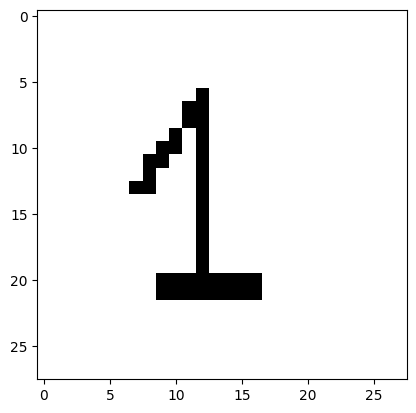

1/1 [==============================] - 0s 88ms/step
this image is probaby a 4


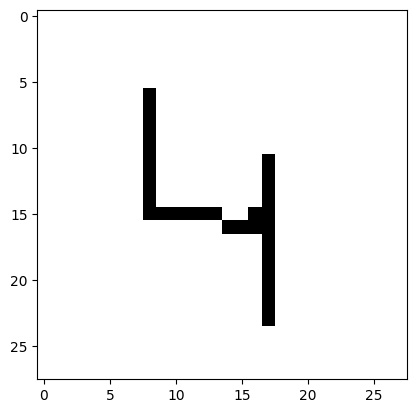

1/1 [==============================] - 0s 59ms/step
this image is probaby a 7


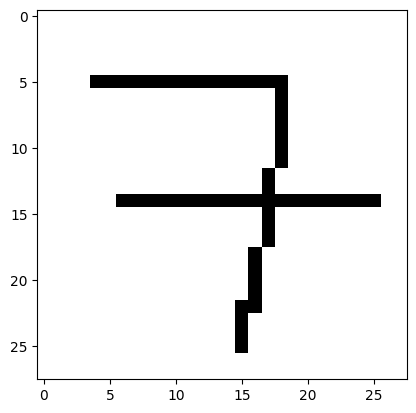

In [19]:
img_number = 1
while os.path.isfile(f"handwritten.model/assets/{img_number}.png"):
    try:
        img = cv2.imread(f"handwritten.model/assets/{img_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"this image is probaby a {np.argmax(prediction)}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print("error!")
    finally:
        img_number += 1